In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sb
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import zipfile

In [2]:
pd.set_option('display.max_columns', 700)
pd.set_option('display.max_colwidth', 100)

In [3]:
pisadict2012 = pd.read_csv('./data/pisadict2012.csv', encoding='latin-1', low_memory=False, index_col=0).T

In [4]:
pisadict2012

CNT  \
x  Country code 3-character   

                                                                                   SUBNATIO  \
x  Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)   

                                                          STRATUM  \
x  Stratum ID 7-character (cnt + region ID + original stratum ID)   

           OECD                            NC  \
x  OECD country  National Centre 6-digit Code   

                                                         SCHOOLID     STIDSTD  \
x  School ID 7-digit (region ID + stratum ID + 3-digit school ID)  Student ID   

               ST01Q01                   ST02Q01        ST03Q01      ST03Q02  \
x  International Grade  National Study Programme  Birth - Month  Birth -Year   

  ST04Q01           ST05Q01           ST06Q01             ST07Q01  \
x  Gender  Attend <ISCED 0>  Age at <ISCED 1>  Repeat - <ISCED 1>   

              ST07Q02             ST07Q03                    ST08Q01  \
x  Repeat - <ISCED 2>  Repeat - <ISCED 3>  Truancy - Late for School   

                           ST09Q01                                  ST115Q01  \
x  Truancy - Skip whole school day  Truancy - Skip classes within school day   

            ST11Q01           ST11Q02             ST11Q03            ST11Q04  \
x  At Home - Mother  At Home - Father  At Home - Brothers  At Home - Sisters   

                  ST11Q05           ST11Q06                    ST13Q01  \
x  At Home - Grandparents  At Home - Others  Mother<Highest Schooling>   

                                   ST14Q01  \
x  Mother Qualifications - <ISCED level 6>   

                                    ST14Q02  \
x  Mother Qualifications - <ISCED level 5A>   

                                    ST14Q03  \
x  Mother Qualifications - <ISCED level 5B>   

                                   ST14Q04                    ST15Q01  \
x  Mother Qualifications - <ISCED level 4>  Mother Current Job Status   

                     ST17Q01                                  ST18Q01  \
x  Father<Highest Schooling>  Father Qualifications - <ISCED level 6>   

                                    ST18Q02  \
x  Father Qualifications - <ISCED level 5A>   

                                    ST18Q03  \
x  Father Qualifications - <ISCED level 5B>   

                                   ST18Q04                    ST19Q01  \
x  Father Qualifications - <ISCED level 4>  Father Current Job Status   

                                 ST20Q01  \
x  Country of Birth International - Self   

                                   ST20Q02  \
x  Country of Birth International - Mother   

                                   ST20Q03  \
x  Country of Birth International - Father   

                               ST21Q01                         ST25Q01  \
x  Age of arrival in <country of test>  International Language at Home   

              ST26Q01                 ST26Q02                    ST26Q03  \
x  Possessions - desk  Possessions - own room  Possessions - study place   

                  ST26Q04                 ST26Q05                 ST26Q06  \
x  Possessions - computer  Possessions - software  Possessions - Internet   

                    ST26Q07               ST26Q08            ST26Q09  \
x  Possessions - literature  Possessions - poetry  Possessions - art   

                   ST26Q10                                    ST26Q11  \
x  Possessions - textbooks  Possessions - <technical reference books>   

                    ST26Q12                   ST26Q13              ST26Q14  \
x  Possessions - dictionary  Possessions - dishwasher  Possessions - <DVD>   

                          ST26Q15                         ST26Q16  \
x  Possessions - <Country item 1>  Possessions - <Country item 2>   

                          ST26Q17                     ST27Q01  \
x  Possessions - <Country item 3>  How many - cellular phones   

                  ST27Q02               ST27Q03          ST27Q04  \
x  How many - televi

In [5]:
with zipfile.ZipFile('./data/pisa2012.csv.zip', 'r') as zip_ref:
    with zip_ref.open('pisa2012.csv') as csv_file:
        pisa2012 = pd.read_csv(csv_file, encoding='latin-1', low_memory=False, index_col=0)

In [6]:
pisa2012.head()

CNT  SUBNATIO  STRATUM      OECD       NC  SCHOOLID  STIDSTD  ST01Q01  \
1  Albania     80000  ALB0006  Non-OECD  Albania         1        1       10   
2  Albania     80000  ALB0006  Non-OECD  Albania         1        2       10   
3  Albania     80000  ALB0006  Non-OECD  Albania         1        3        9   
4  Albania     80000  ALB0006  Non-OECD  Albania         1        4        9   
5  Albania     80000  ALB0006  Non-OECD  Albania         1        5        9   

   ST02Q01  ST03Q01  ST03Q02 ST04Q01                      ST05Q01  ST06Q01  \
1      1.0        2     1996  Female                         No        6.0   
2      1.0        2     1996  Female  Yes, for more than one year      7.0   
3      1.0        9     1996  Female  Yes, for more than one year      6.0   
4      1.0        8     1996  Female  Yes, for more than one year      6.0   
5      1.0       10     1996  Female  Yes, for more than one year      6.0   

     ST07Q01    ST07Q02    ST07Q03             ST08Q01 ST09Q01  ST115Q01  \
1  No, never  No, never  No, never              None    None         1.0   
2  No, never  No, never  No, never  One or two times    None         1.0   
3  No, never  No, never  No, never              None    None         1.0   
4  No, never  No, never  No, never              None    None         1.0   
5  No, never  No, never  No, never  One or two times    None         2.0   

  ST11Q01 ST11Q02 ST11Q03 ST11Q04 ST11Q05 ST11Q06  \
1     Yes     Yes     Yes     Yes     NaN     NaN   
2     Yes     Yes     NaN     Yes     NaN     NaN   
3     Yes     Yes      No     Yes      No      No   
4     Yes     Yes      No     Yes      No      No   
5     Yes     Yes     Yes     NaN     NaN     NaN   

                                 ST13Q01 ST14Q01 ST14Q02 ST14Q03 ST14Q04  \
1                      <ISCED level 3A>       No      No      No      No   
2                      <ISCED level 3A>      Yes     Yes      No      No   
3                  <ISCED level 3B, 3C>      Yes     Yes     Yes      No   
4                  <ISCED level 3B, 3C>       No      No      No      No   
5  She did not complete <ISCED level 1>       No      No      No      No   

                              ST15Q01                ST17Q01 ST18Q01 ST18Q02  \
1  Other (e.g. home duties, retired)       <ISCED level 3A>      NaN     NaN   
2        Working full-time <for pay>       <ISCED level 3A>       No      No   
3        Working full-time <for pay>       <ISCED level 3A>      Yes      No   
4        Working full-time <for pay>       <ISCED level 3A>      Yes     Yes   
5         Working part-time <for pay>  <ISCED level 3B, 3C>       No      No   

  ST18Q03 ST18Q04                       ST19Q01          ST20Q01  \
1     NaN     NaN   Working part-time <for pay>  Country of test   
2      No      No  Working full-time <for pay>   Country of test   
3     Yes     Yes  Working full-time <for pay>   Country of test   
4      No      No  Working full-time <for pay>   Country of test   
5      No     Yes   Working part-time <for pay>  Country of test   

           ST20Q02          ST20Q03  ST21Q01               ST25Q01 ST26Q01  \
1  Country of test  Country of test      NaN  Language of the test     Yes   
2  Country of test  Country of test      NaN  Language of the test     Yes   
3  Country of test  Country of test      NaN  Language of the test     Yes   
4  Country of test  Country of test      NaN  Language of the test     Yes   
5  Country of test  Country of test      NaN  Language of the test     Yes   

  ST26Q02 ST26Q03 ST26Q04 ST26Q05 ST26Q06 ST26Q07 ST26Q08 ST26Q09 ST26Q10  \
1      No     Yes      No      No      No      No     Yes      No     Yes   
2     Yes     Yes     Yes     Yes     Yes     Yes     Yes     Yes     Yes   
3     Yes     Yes     Yes      No     Yes     Yes     Yes     Yes     Yes   
4     Yes     Yes     Yes     Yes     Yes     Yes     Yes     Yes     Yes   
5     Yes      No     Yes     Yes     Yes     Yes     Yes     Yes     Yes   

  

In [7]:
pisa2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485490 entries, 1 to 485490
Columns: 635 entries, CNT to VER_STU
dtypes: float64(250), int64(17), object(368)
memory usage: 2.3+ GB


In [8]:
', '.join(pisa2012.NC.unique())

'Albania, United Arab Emirates , Argentina, Australia, Austria, Belgium, Bulgaria , Brazil , Canada , Switzerland, Chile, Colombia , Costa Rica , Czech Republic , Germany, Denmark, Spain, Estonia, Finland, France , United Kingdom (excl.Scotland) , United Kingdom (Scotland), Greece , Hong Kong-China, Croatia, Hungary, Indonesia, Ireland, Iceland, Israel , Italy, Jordan , Japan, Kazakhstan , Republic of Korea, Liechtenstein, Lithuania, Luxembourg , Latvia , Macao-China, Mexico , Montenegro , Malaysia , Netherlands, Norway , New Zealand, Peru , Poland , Portugal , Qatar, China (Shanghai) , Perm (Russian Federation), United States of America , Romania, Russian Federation , Singapore, Serbia , Slovak Republic, Slovenia , Sweden , Chinese Taipei , Thailand , Tunisia, Turkey , Uruguay, Viet Nam '

In [9]:
dummy_columns =    ['NC', 'ST03Q01', 'ST03Q02', 'ST04Q01',
    'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH',
    'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ',
    'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']

dict = {
    'AGE': 'Age',
    'HISEI': 'Occupational',
    'PARED': 'Education',
    'HOMEPOS': 'Home Setup',
    'ESCS': 'Socioeconomic'
}

NC_renaming = {
    "United Kingdom (excl.Scotland)": "United Kingdom",
    "United Kingdom (Scotland)": "United Kingdom",
    "Hong Kong-China": "Greater China\n (excl.Mainland)",
    "Macao-China": "Greater China\n (excl.Mainland)",
    "China (Shanghai)": "Greater China\n (excl.Mainland)",
    "Perm (Russian Federation)": "Russian Federation",
    "United States of America" :"USA",
    "Singapore": "Greater China\n (excl.Mainland)",
    "Chinese Taipei": "Greater China\n (excl.Mainland)"
}

selected_columns = list(dict.keys()) + dummy_columns
pisadict2012clean = pisadict2012[selected_columns].rename(columns=dict)
pisa2012clean = pisa2012[selected_columns].rename(columns=dict)

In [10]:
Dependencies = ['Education', 'Occupational', 'Home Setup']
Subjects = ['Math', 'Reading', 'Science']

In [11]:
pisa2012clean['Country'] = pisa2012clean['NC'].str.rstrip().replace(NC_renaming)
pisa2012clean['Male'] = pisa2012clean['ST04Q01'].map({'Male': 1, 'Female': 0})
pisa2012clean['Math'] = pisa2012clean[[f'PV{i}MATH' for i in range(1, 6)]].mean(axis=1)
pisa2012clean['Reading'] = pisa2012clean[[f'PV{i}READ' for i in range(1, 6)]].mean(axis=1)
pisa2012clean['Science'] = pisa2012clean[[f'PV{i}SCIE' for i in range(1, 6)]].mean(axis=1)
pisa2012clean['Total'] = pisa2012clean[Subjects].mean(axis=1)

In [12]:
pisadict2012clean = pisadict2012clean.loc[:, ~pisadict2012clean.columns.isin(dummy_columns)]
pisa2012clean = pisa2012clean.loc[:, ~pisa2012clean.columns.isin(dummy_columns)]

In [13]:
Total_mean = pisa2012clean.groupby('Country')['Total'].mean()
order = Total_mean.sort_values(ascending=False).index.tolist()

In [14]:
pisadict2012clean.T

x
Age                                           Age of student
Occupational            Highest parental occupational status
Education                Highest parental education in years
Home Setup                                  Home Possessions
Socioeconomic  Index of economic, social and cultural status

In [15]:
pisa2012clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485490 entries, 1 to 485490
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Age            485374 non-null  float64
 1   Occupational   450621 non-null  float64
 2   Education      473091 non-null  float64
 3   Home Setup     479807 non-null  float64
 4   Socioeconomic  473648 non-null  float64
 5   Country        485490 non-null  object 
 6   Male           485490 non-null  int64  
 7   Math           485490 non-null  float64
 8   Reading        485490 non-null  float64
 9   Science        485490 non-null  float64
 10  Total          485490 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 44.4+ MB


# How is total performance distributed among participants?

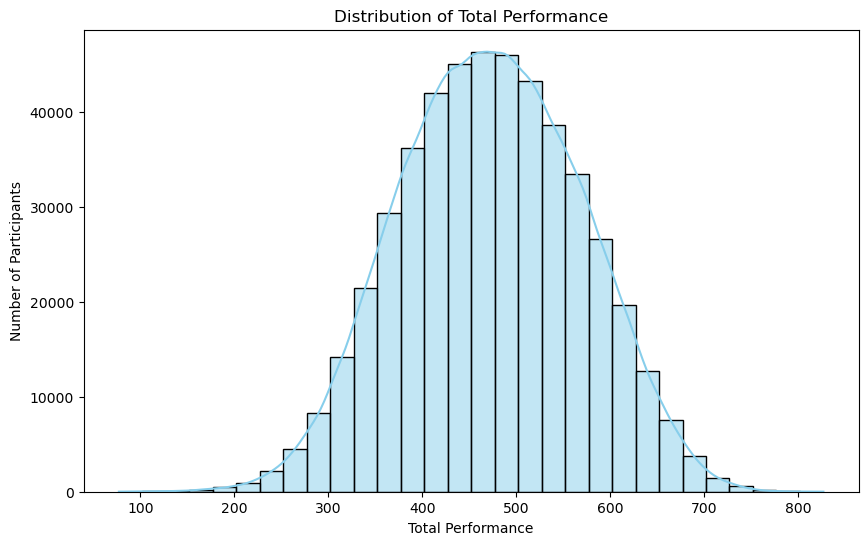

In [16]:
# Creating a histogram to visualize the distribution of total performance
plt.figure(figsize=(10, 6))
sb.histplot(pisa2012clean['Total'], kde=True, bins=30, color='skyblue')

# Setting the title, x-axis label, and y-axis label
plt.title('Distribution of Total Performance')
plt.xlabel('Total Performance')
plt.ylabel('Number of Participants');

## It shows the frequency distribution of participants' total performance scores, suggesting a roughly normal distribution with a peak around the 400-500 range.

# What is the distribution of educational levels among participants?

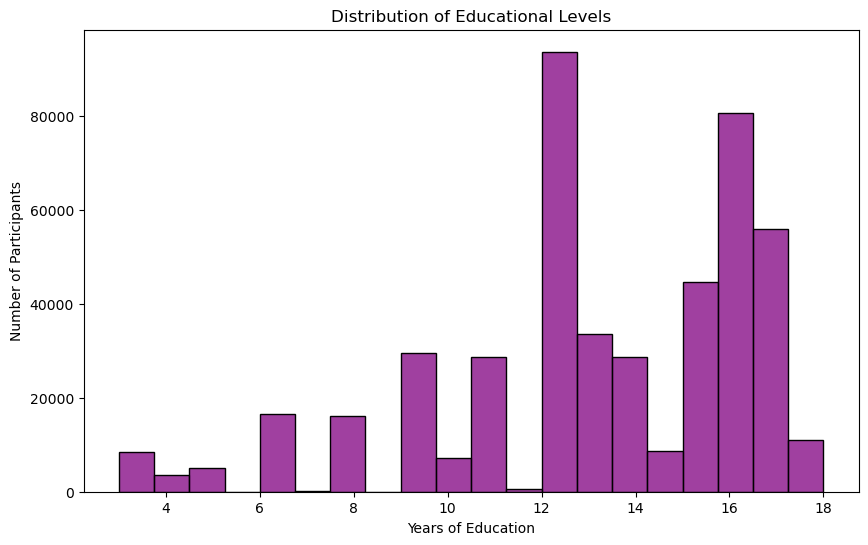

In [17]:
plt.figure(figsize=(10, 6))

# Plotting the histogram of educational levels
sb.histplot(pisa2012clean['Education'], bins=20, color='purple')

# Setting the title, x-axis label, and y-axis label
plt.title('Distribution of Educational Levels')
plt.xlabel('Years of Education')
plt.ylabel('Number of Participants');

## This histogram displays the count of participants according to the number of years of education they have completed, with notable peaks at 12 and 16 years, suggesting high school and college education levels respectively.

# What is the age distribution of participants?

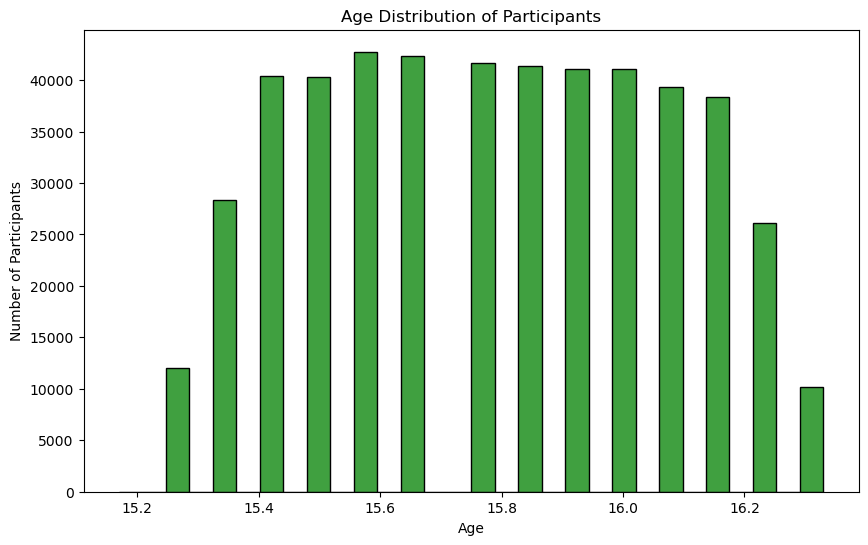

In [18]:
# Plotting the histogram of age distribution
plt.figure(figsize=(10, 6))
sb.histplot(pisa2012clean['Age'], bins=30, color='green')

# Setting the title, x-axis label, and y-axis label
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Number of Participants');

## The histogram shows that participant ages are concentrated around 15-16 years, which could indicate a study involving high school students.

# Is there a difference in math performance between genders?

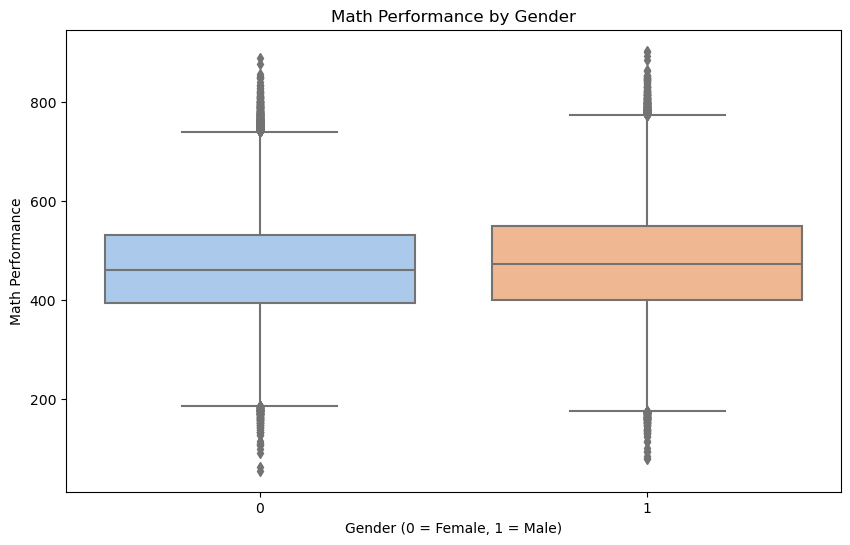

In [19]:
# Creating a boxplot to visualize math performance by gender
plt.figure(figsize=(10, 6))
sb.boxplot(x='Male', y='Math', data=pisa2012clean, palette='pastel')

# Setting the title, x-axis label, and y-axis label
plt.title('Math Performance by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Math Performance');

## The box plot compares the distribution of math performance scores between male (1) and female (0) participants. It indicates median performance and the range of scores for each gender.

# How does math performance vary across different age groups?

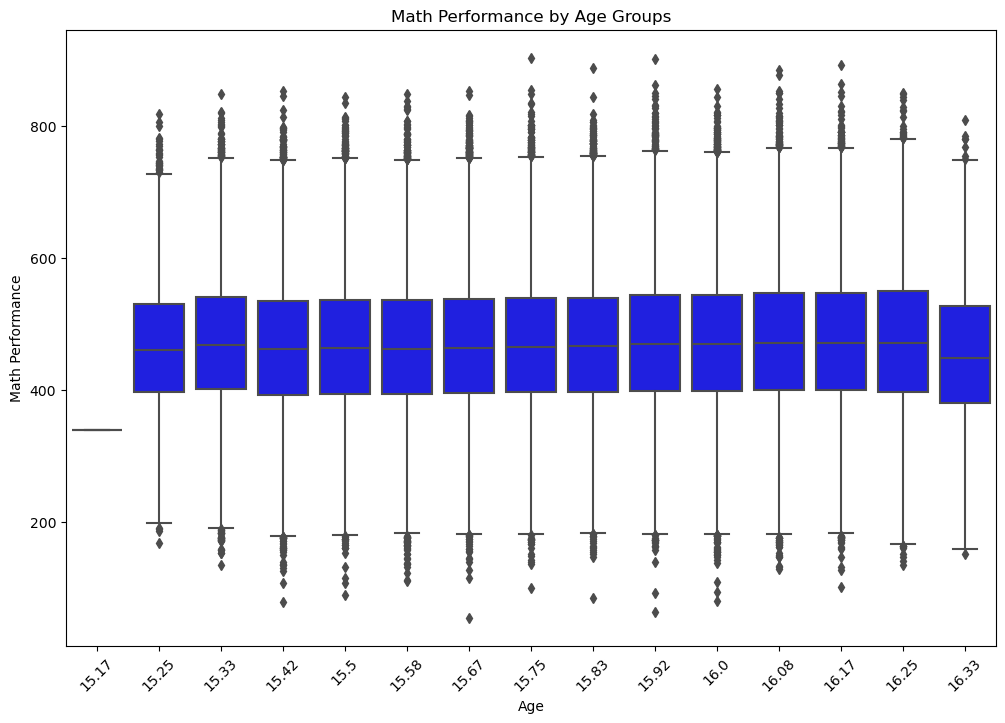

In [20]:
# Plotting boxplot for Math performance by Age groups
plt.figure(figsize=(12, 8))
sb.boxplot(x='Age', y='Math', data=pisa2012clean, color='blue')

# Setting the title, x-axis label, and y-axis label
plt.title('Math Performance by Age Groups')
plt.xlabel('Age')
plt.ylabel('Math Performance')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45);

## It provides a box plot for each age group, showing the central tendency and spread of math performance within those groups.

# Is there a correlation between socioeconomic status and total performance

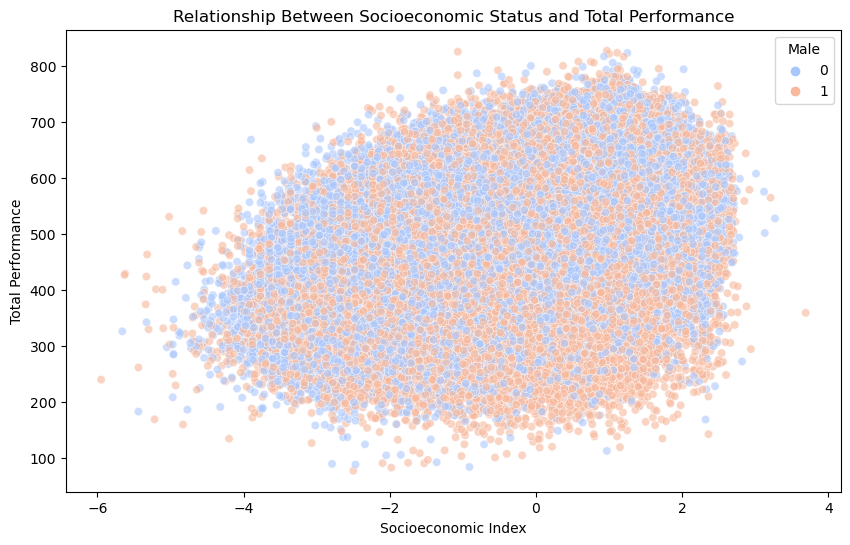

In [21]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Socioeconomic', y='Total', data=pisa2012clean, hue='Male', palette='coolwarm', alpha=.6)

# Set title and axis labels
plt.title('Relationship Between Socioeconomic Status and Total Performance')
plt.xlabel('Socioeconomic Index')
plt.ylabel('Total Performance');

## The scatter plot depicts individual data points representing participants, colored by gender, against socioeconomic index scores and their corresponding total performance.

# What is the average socioeconomic status in each country?

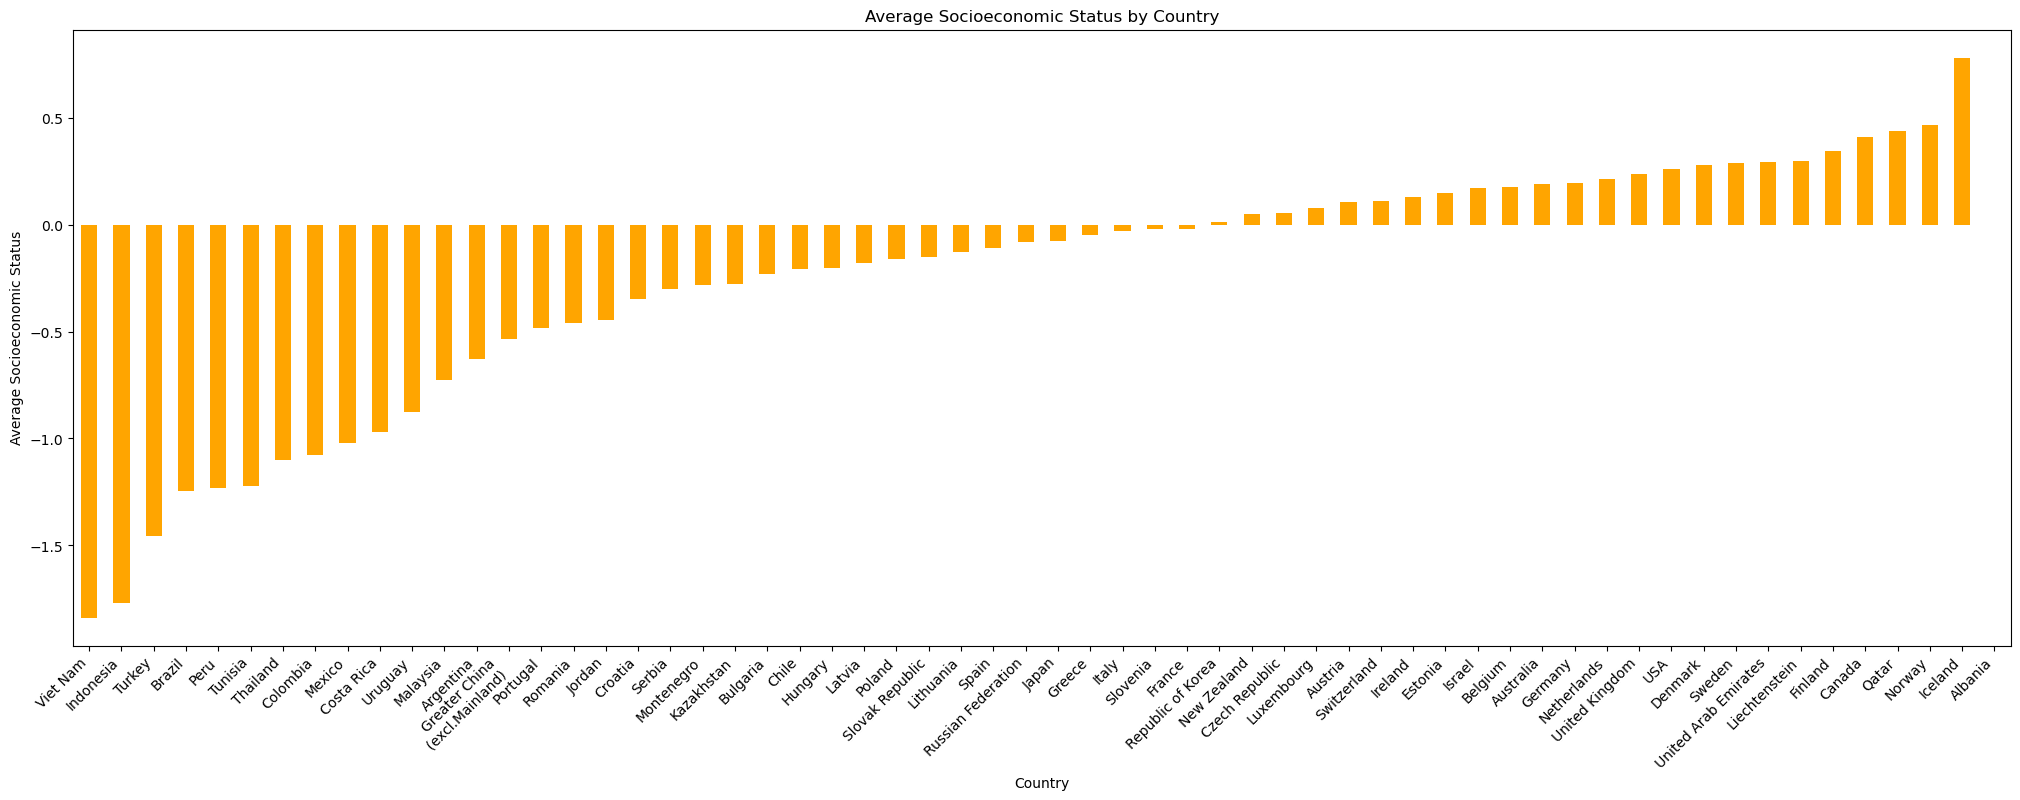

In [22]:
# Calculating the average socioeconomic status by country and sorting the values
average_socioeconomic_by_country = pisa2012clean.groupby('Country')['Socioeconomic'].mean().sort_values()

# Plotting the bar chart
plt.figure(figsize=(25, 8))
average_socioeconomic_by_country.plot(kind='bar', color='orange')

# Setting the title, x-axis label, and y-axis label
plt.title('Average Socioeconomic Status by Country')
plt.xlabel('Country')
plt.ylabel('Average Socioeconomic Status')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha="right");

## The bar chart ranks countries by their average socioeconomic status.

# How does average reading performance compare between genders across different countries?

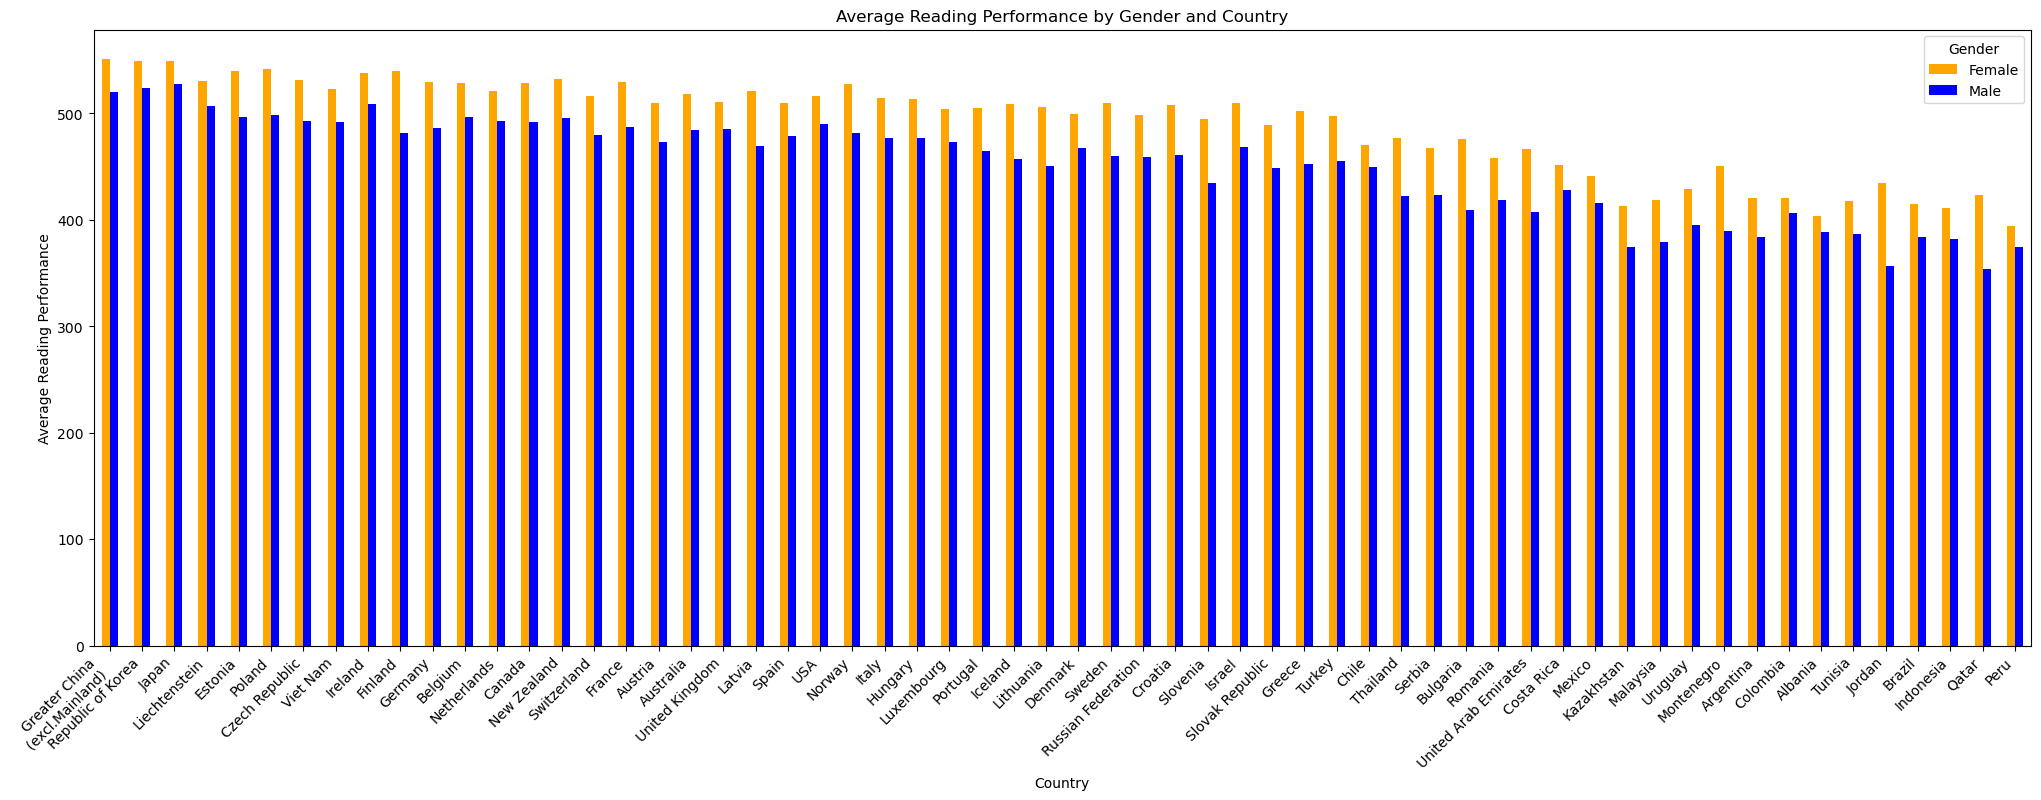

In [23]:
# Grouping data by 'Country' and 'Male' and calculating the average reading performance
average_reading_by_gender_country = pisa2012clean.groupby(['Country', 'Male'])['Reading'].mean().unstack()

# Sorting the data based on the specified order
average_reading_by_gender_country = average_reading_by_gender_country.loc[order]

# Plotting the bar chart
average_reading_by_gender_country.plot(kind='bar', figsize=(25, 8), color=['orange','blue'])

# Setting the title, x-axis label, and y-axis label
plt.title('Average Reading Performance by Gender and Country')
plt.xlabel('Country')
plt.ylabel('Average Reading Performance')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adding legend
plt.legend(title='Gender', labels=['Female', 'Male']);

## It shows a side-by-side comparison of male and female reading performance averages for each country.

# What is the gender distribution among participants?

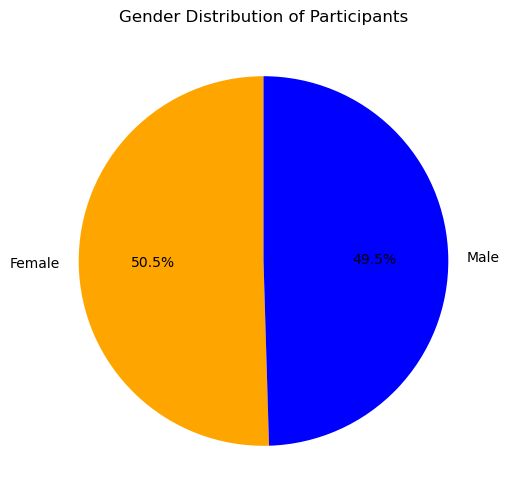

In [24]:
# Counting the distribution of genders
gender_counts = pisa2012clean['Male'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=['orange','blue'])

# Setting the title for the plot
plt.title('Gender Distribution of Participants');

## It's a pie chart illustrating the percentage of male and female participants, indicating a nearly even split.

# What is the cumulative distribution of socioeconomic status among participants?

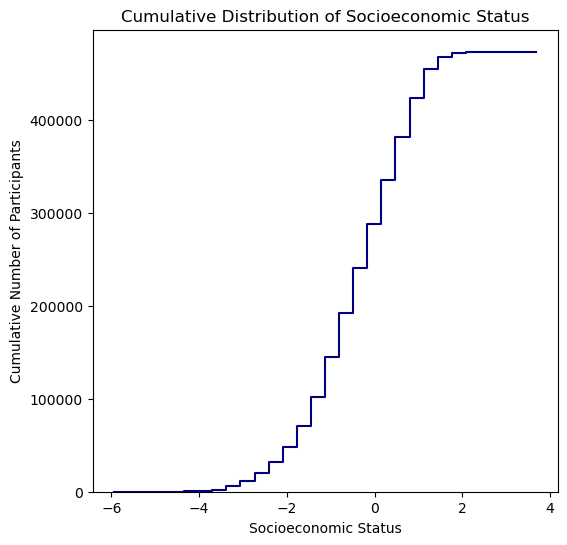

In [25]:
# Create a figure with a specific size
plt.figure(figsize=(6, 6))

# Plot a cumulative histogram of 'Socioeconomic' pisa2012clean
sb.histplot(pisa2012clean['Socioeconomic'], bins=30, cumulative=True, element="step", fill=False, color='navy')

# Set title, x-axis label, and y-axis label
plt.title('Cumulative Distribution of Socioeconomic Status')
plt.xlabel('Socioeconomic Status')
plt.ylabel('Cumulative Number of Participants');

## It shows how the socioeconomic status of participants accumulates across the range of status levels.

# How many participants are there from each country in this study?

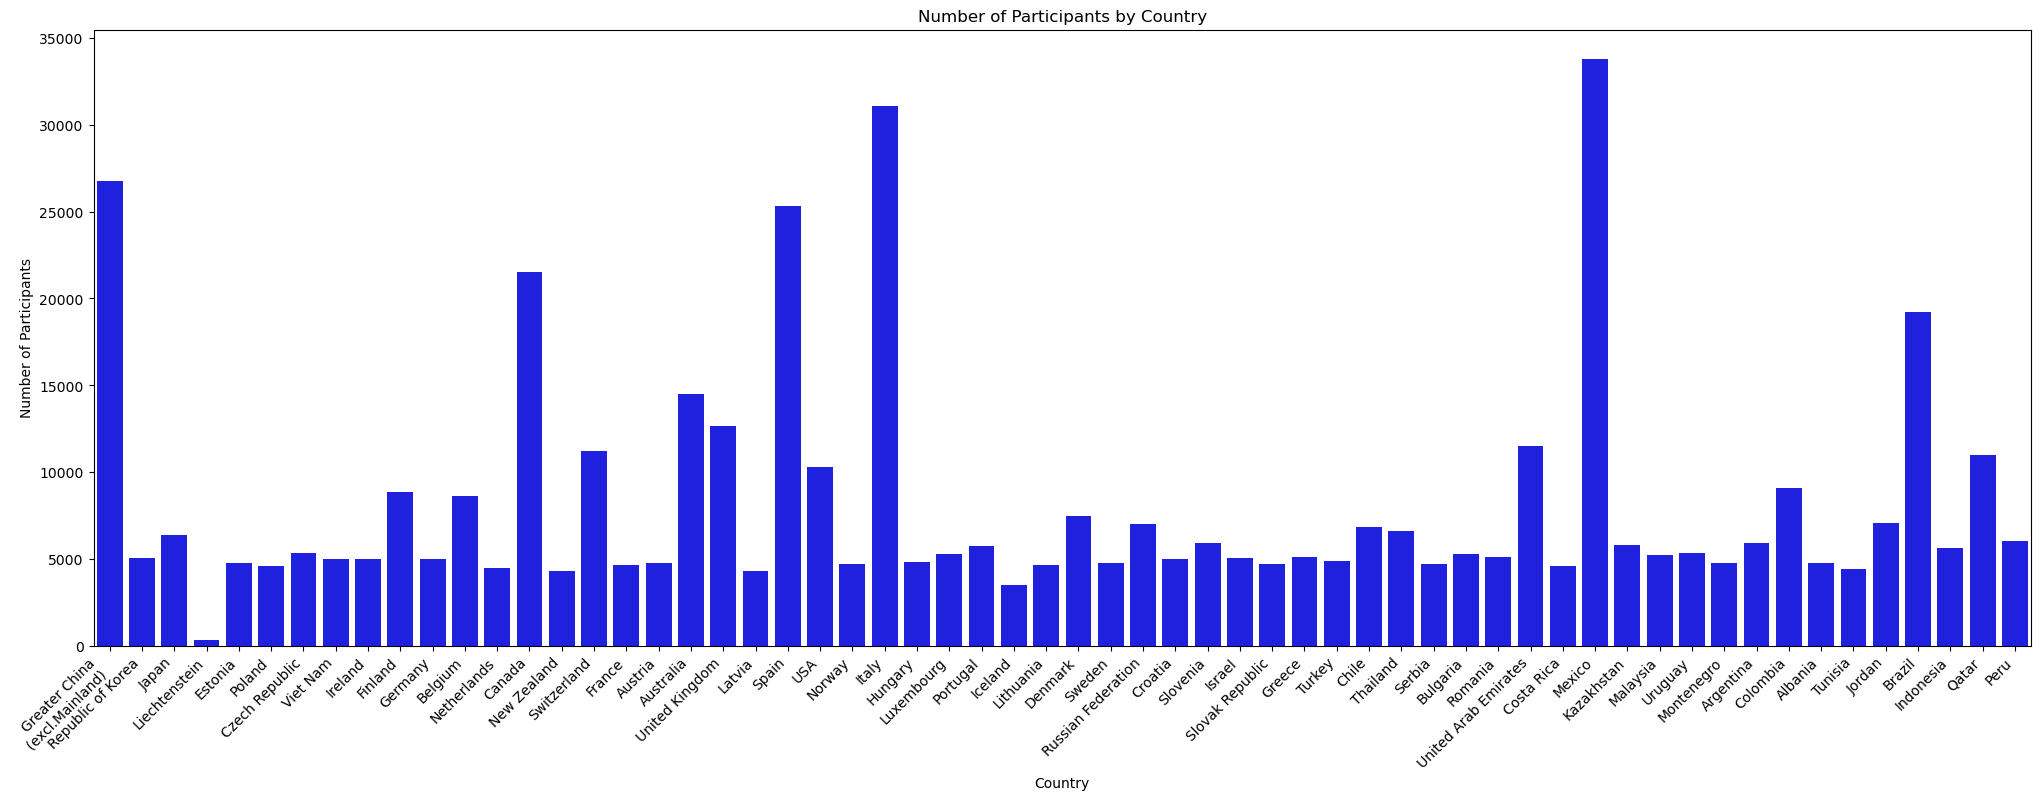

In [26]:
plt.figure(figsize=(25, 8))
    
# Plotting countplot with x and y axes swapped and applying order to countries
sb.countplot(x='Country', data=pisa2012clean, order=order, color='blue')
    
# Setting plot title, labels, and displaying the plot
plt.title('Number of Participants by Country')
plt.xlabel('Country')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha="right");

## It displays the number of participants from various countries, with some countries having significantly higher numbers of participants than others.

# What is the percentage of male and female participants in each country?

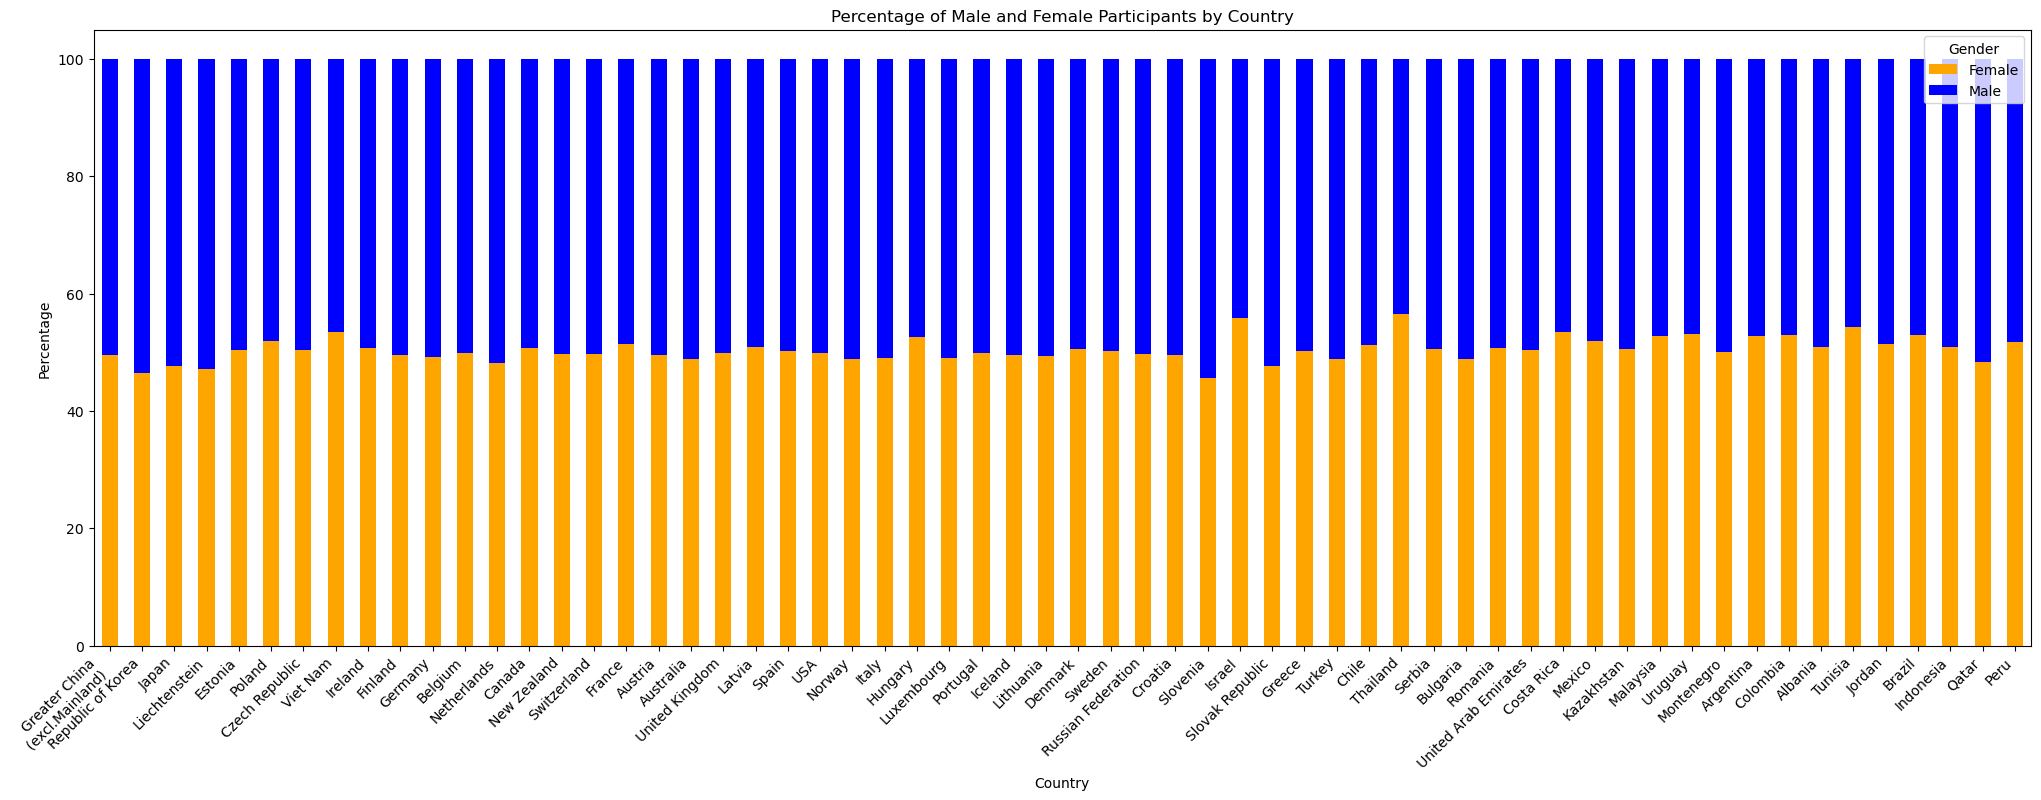

In [27]:
# Group pisa2012clean by 'Country' and calculate percentage distribution of 'Male' values
gender_distribution_per_country = pisa2012clean.groupby('Country')['Male'].value_counts(normalize=True).unstack().fillna(0) * 100
# Reorder the rows based on the specified order
gender_distribution_per_country = gender_distribution_per_country.loc[order]

# Plotting
gender_distribution_per_country.plot(kind='bar', stacked=True, color=['orange','blue'], figsize=(25, 8))

# Setting plot title, labels, and legend
plt.title('Percentage of Male and Female Participants by Country')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Gender', labels=['Female', 'Male']);

## Each bar represents a country with proportions of male and female participants stacked on top of each other, showing gender distribution across countries.

In [31]:
def plot_average_total_score():
    # Calculating mean total scores for males and females by country
    male_mean = pisa2012clean.query("Male == 1").groupby('Country')['Total'].mean()
    female_mean = pisa2012clean.query("Male == 0").groupby('Country')['Total'].mean()

    # Setting up y-axis ticks
    ybins = np.arange(10, 900 + 20, 20)
    yticks = ybins[::1] - 10

    # Creating the plot
    fig, ax1 = plt.subplots(figsize=(25, 10))
    plt.yticks(yticks)
    plt.xticks(rotation=60, ha='right')
    
    # Boxplot showing the interquartile range (IQR)
    sb.boxplot(data=pisa2012clean, x='Country', y='Total', order=order, showfliers=False, whis=0, color='lightgray', ax=ax1, width=.5, linewidth=.5)
    
    # Adding gridlines
    plt.grid(True, linestyle='--', linewidth=.3)

    # Plotting average markers for each country
    for i, country in enumerate(order):
        mean_val = Total_mean[country]
        mean_val_male = male_mean[country]
        mean_val_female = female_mean[country]
 
        ax1.plot(i, mean_val_male, marker='o', color='blue', markersize=8)
        ax1.plot(i, mean_val_female, marker='o', color='orange', markersize=8)
        ax1.plot(i, mean_val, marker='x', color='black', markersize=8)

    # Setting labels and title
    ax1.set_ylabel('Total Scores', fontsize=16)
    ax1.set_xlabel('')
    plt.title('Total Scores: IQR with Avg. Markers by Countries', fontsize=24)
    
    # Adding legend
    legend_labels = ['Total Avg.', 'Male Avg.', 'Female Avg.']
    legend_handles = [plt.Line2D([0], [0], marker='x', color='black', markersize=24, linestyle='None'),
                      plt.Line2D([0], [0], marker='o', color='blue', markersize=24, linestyle='None'),
                      plt.Line2D([0], [0], marker='o', color='orange', markersize=24, linestyle='None')]
    plt.legend(legend_handles, legend_labels, fontsize=24)


# What is the distribution of total scores among participants, and how does the average score differ by gender across countries?

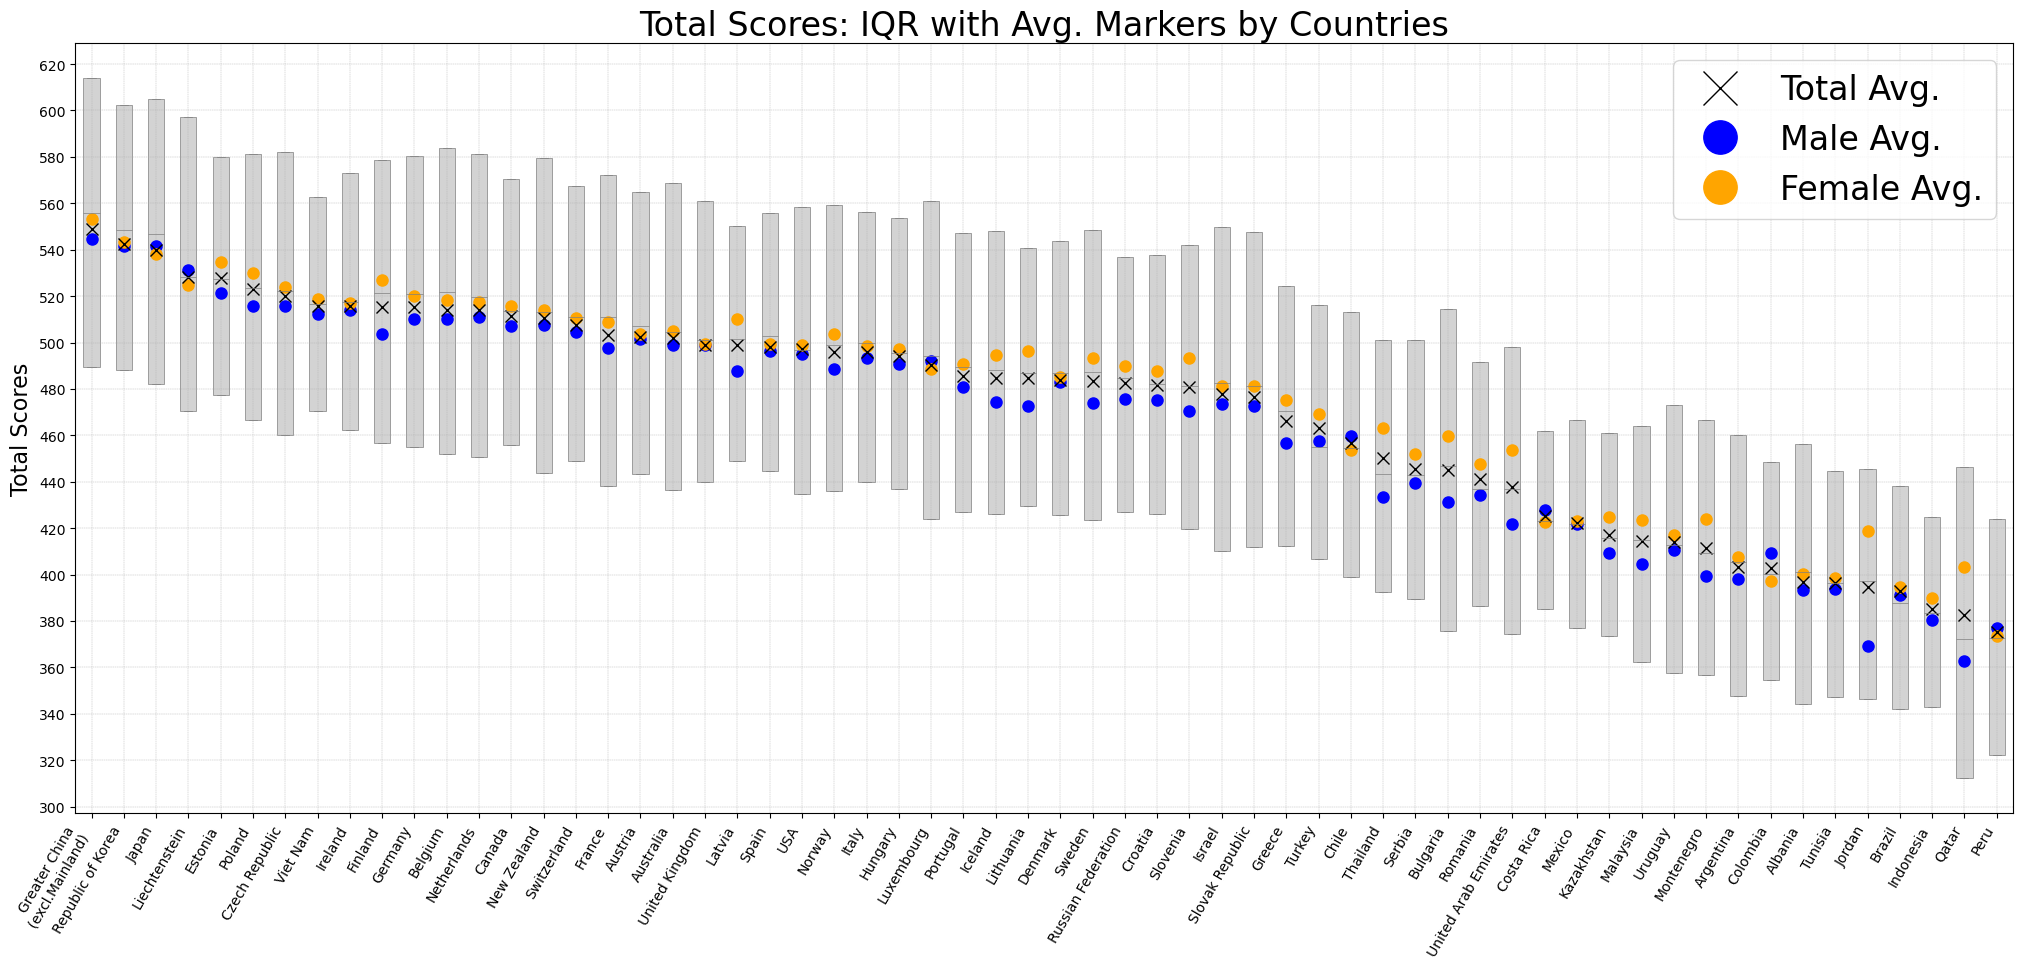

In [34]:
plot_average_total_score()

## The box plots show the interquartile range (IQR) of total scores in various countries, with markers indicating the average scores for males and females.

In [35]:
def plot_score_distribution(pisa_2012_clean, Subjects):
    # Create a figure with appropriate size
    plt.figure(figsize=[25, 1+9/len(Subjects)])
    
    # Define bin edges for x and y axes
    xbins = np.arange(10, 900 + 20, 20)
    ybins = np.arange(0, .0042 + .0002, .0002)
    
    # Define tick locations for x and y axes
    xticks = xbins[::len(Subjects)] - 10
    yticks = ybins[::len(Subjects)]
    
    # Iterate over each subject and plot the distribution by gender
    for col_index, Subject in enumerate(Subjects):
        ax = plt.subplot(1, len(Subjects), col_index + 1)
        
        # Plot kernel density estimate (KDE) for male and female scores
        sb.kdeplot(data=pisa_2012_clean[pisa_2012_clean['Male'] == 1][Subject], label='Male', color='blue', ax=ax)
        sb.kdeplot(data=pisa_2012_clean[pisa_2012_clean['Male'] == 0][Subject], label='Female', color='orange', ax=ax)    
        
        # Set tick locations and labels for x and y axes
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        ax.set_xticklabels(xticks, rotation=15) 
        ax.set_yticklabels((yticks*1000).round(1))
        
        # Add grid lines and set axis limits
        ax.grid(axis='y', linestyle='--', alpha=.5)
        ax.set_xlim(0, 910)
        ax.set_ylim(0, .0042)
        
        # Set title, x-axis label, and y-axis label
        ax.set_title(Subject, fontsize=16)
        ax.set_xlabel(f'{Subject} Scores', fontsize=16)
        ax.set_ylabel('Parts per thousand' if col_index == 0 else '', fontsize=16)
        
        # Add legend
        ax.legend(loc='lower center', fontsize=8+24/len(Subjects))

    # Set super title
    plt.suptitle(f'Distribution of Student Scores {"across Subjects " if Subjects != ["Total"] else ""}by Gender', fontsize=24, y=.89+len(Subjects)/18)

# What is the distribution of student scores by gender?

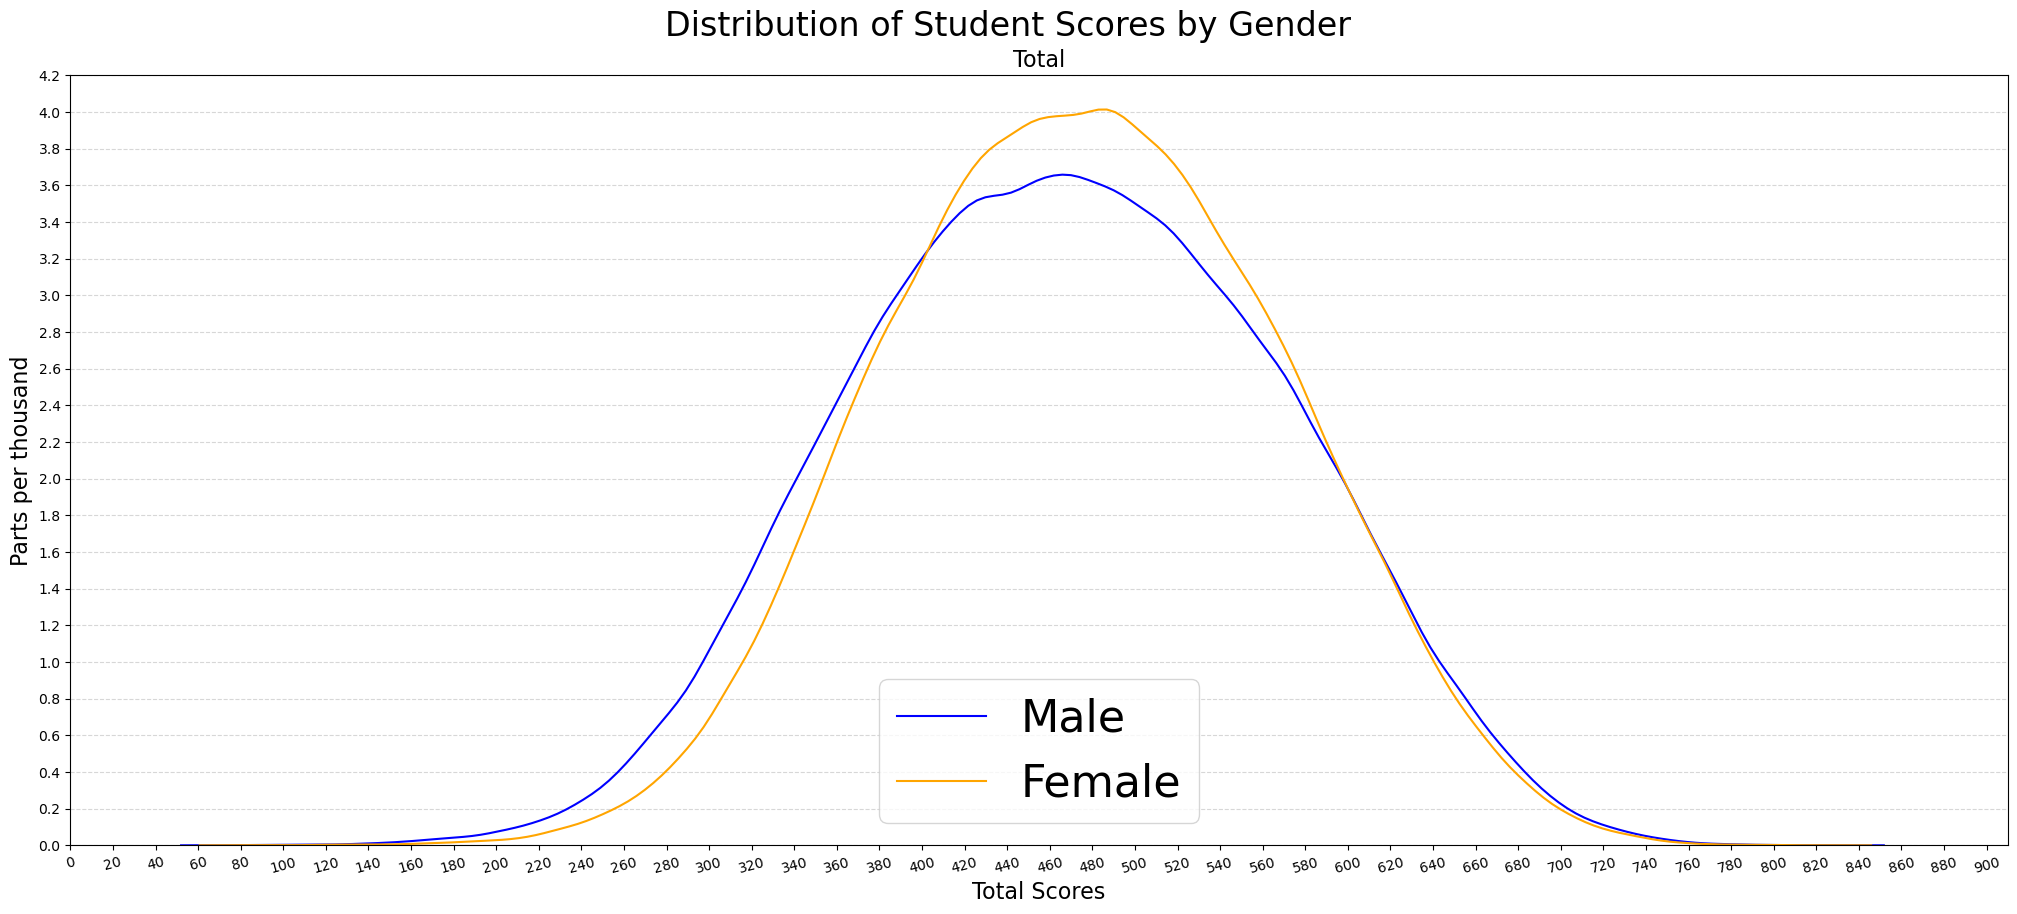

In [36]:
plot_score_distribution(pisa2012clean, Subjects=['Total'])

## The plot compares the distribution curves for male and female participants, showing where scores are most concentrated.

# How are student scores distributed across different subjects by gender?

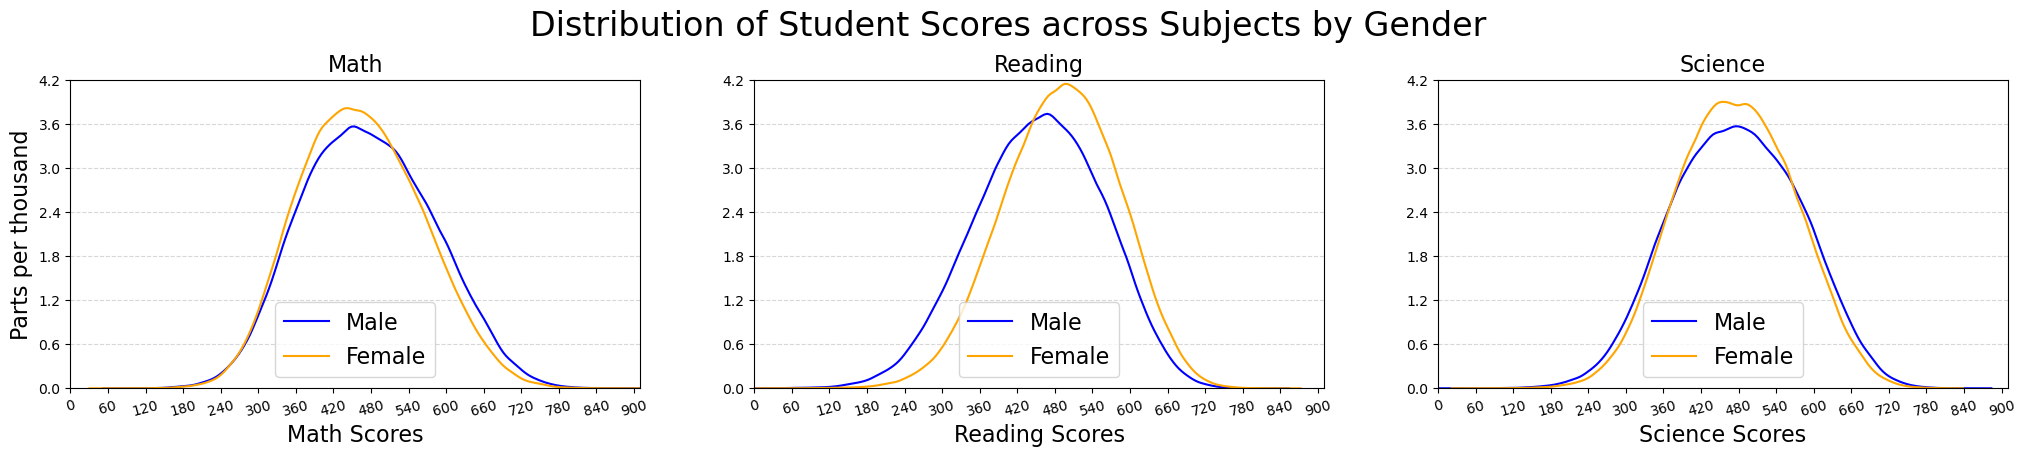

In [37]:
plot_score_distribution(pisa2012clean, Subjects)

## There are separate density plots for math, reading, and science scores, each comparing the score distributions for male and female students.

In [38]:
def plot_dependent_distribution(pisa_2012_clean, Subjects, Dependencies):
    # Create subplots grid
    fig, axs = plt.subplots(len(Dependencies), len(Subjects), figsize=(25, 12), squeeze=False)   
    
    # Define bins and xticks
    bins = np.arange(10, 900 + 20, 20)
    xticks = bins[::len(Subjects)] - 10

    # Iterate over rows and columns
    for row_index, Dependency in enumerate(Dependencies):
        for col_index, Subject in enumerate(Subjects):
            # Add jitter to the dependent variable
            jittered_dependent = pisa_2012_clean[Dependency] + np.random.uniform(-.35, .35, size=len(pisa_2012_clean))
            # Calculate correlation coefficient
            correlation = pisa_2012_clean[Subject].corr(pisa_2012_clean[Dependency])
            # Create hexbin plot
            hb = axs[row_index, col_index].hexbin(pisa_2012_clean[Subject], jittered_dependent, bins='log', vmin=1, vmax=2000)
            
            # Customize x-axis
            axs[row_index, col_index].set_xticks(xticks)
            axs[row_index, col_index].set_xticklabels(xticks, rotation=15)
            axs[row_index, col_index].set_xlim(0, 910)
            
            # Add correlation coefficient text
            axs[row_index, col_index].text(.84, .02, f'ρ = {correlation:.2f}', transform=axs[row_index, col_index].transAxes, fontsize=54/len(Subjects)-4)
            
            # Set title, x-axis label, and y-axis label
            axs[row_index, col_index].set_title(f'{Subject} | {Dependency}', fontsize=10)
            axs[row_index, col_index].set_xlabel(f'{Subject} Scores' if row_index == len(Dependencies)-1 else '', fontsize=16)
            axs[row_index, col_index].set_ylabel(f'{Dependency} Index' if col_index == 0 else '', fontsize=16)

        # Add colorbar
        cbar_ax = fig.add_axes([.91, .11 + row_index * .272, .01, (.815 / len(Dependencies))-.045])
        cbar = fig.colorbar(hb, cax=cbar_ax)
        cbar.set_ticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000])
        cbar.ax.yaxis.set_major_formatter(ScalarFormatter())
        cbar.set_label('Frequency', fontsize=16)

    # Add overall title
    plt.suptitle(f'Distribution of Student Scores {(Subjects != ["Total"]) * "across Subjects "}depending on Parental Factors{(Dependencies == ["Socioeconomic"]) * " together"}', fontsize=24, y=.93)

# What is the relationship between student scores and their socioeconomic background?

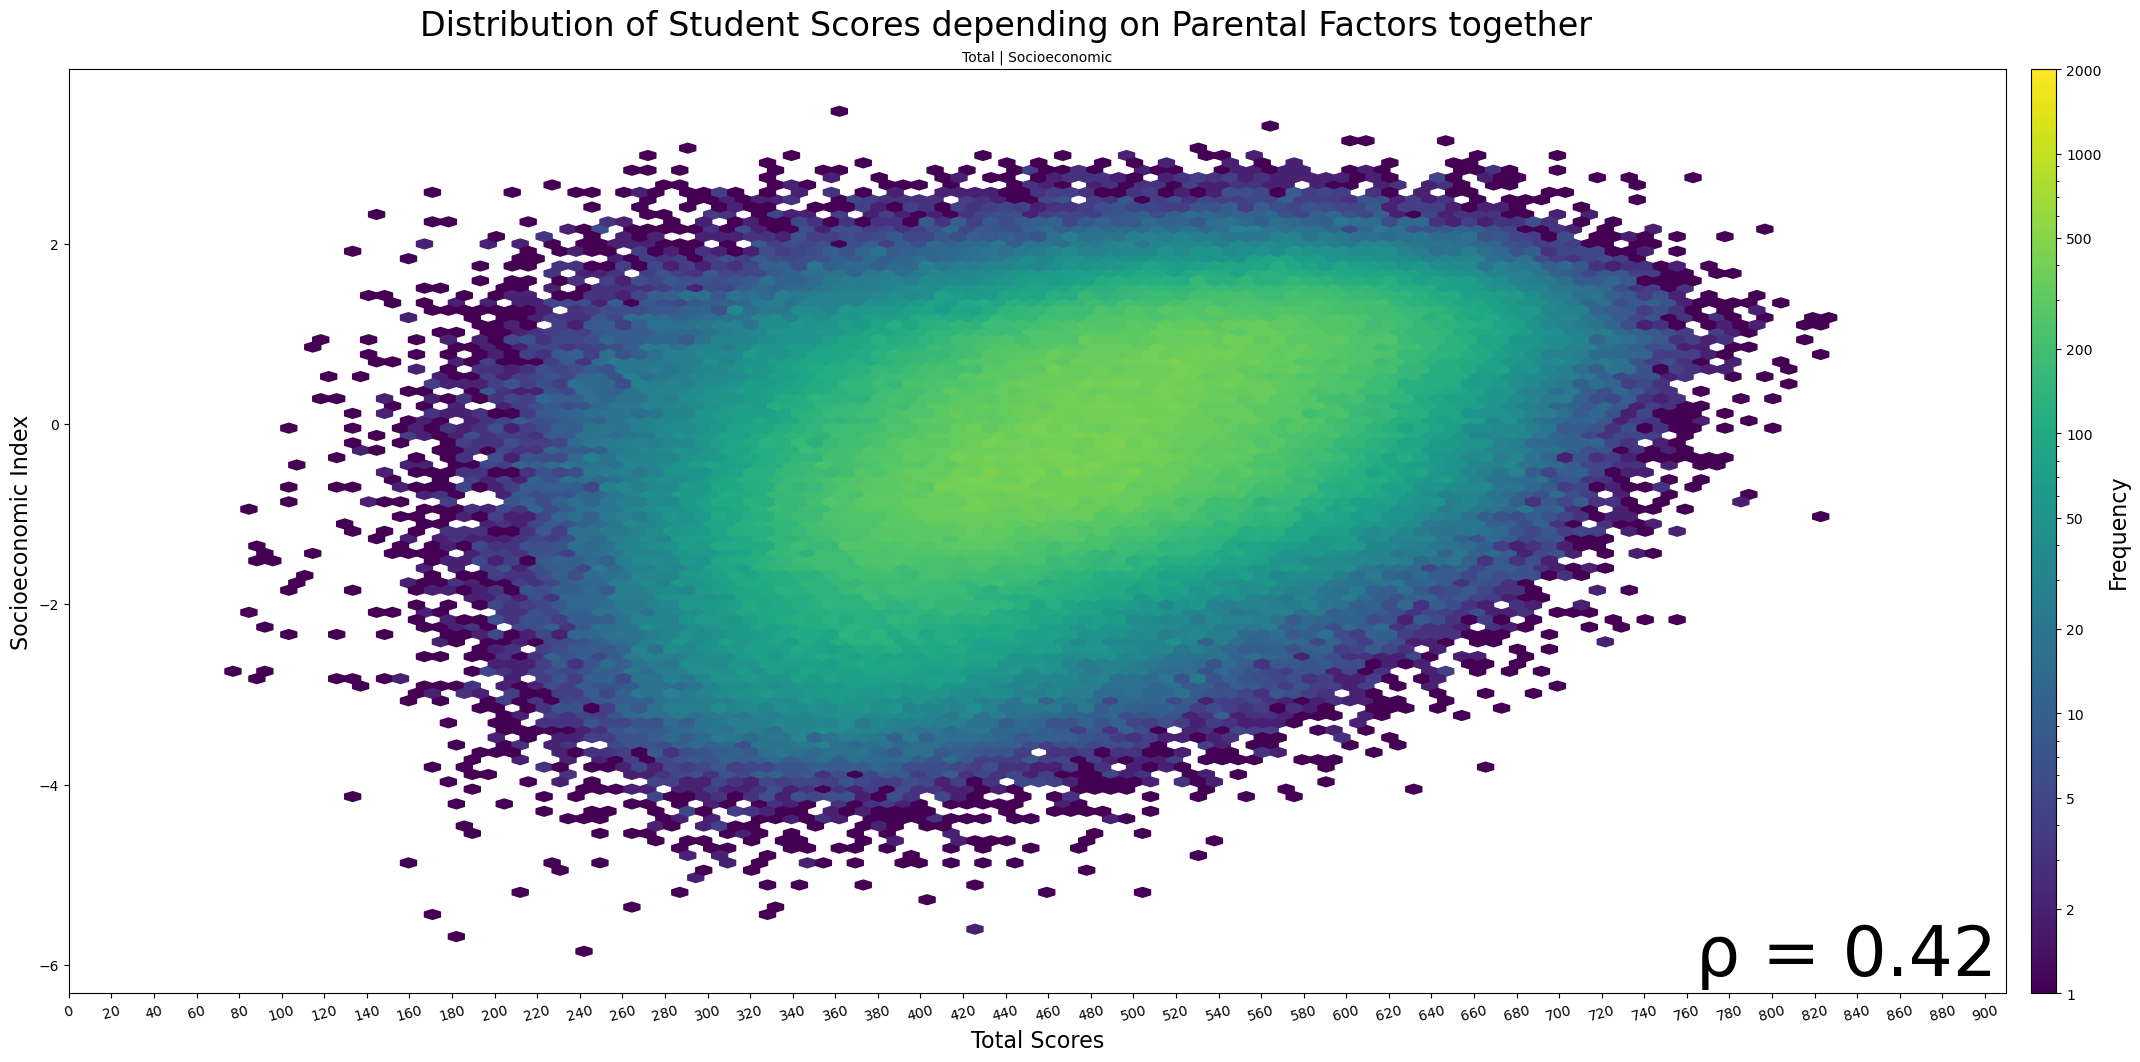

In [39]:
plot_dependent_distribution(pisa2012clean, Subjects=["Total"], Dependencies=["Socioeconomic"])

## This hexbin plot shows concentrations of student scores against socioeconomic index, with a color density indicating the frequency of scores. The correlation coefficient (ρ) suggests the strength of the relationship.

# How do parental factors such as education, occupation, and home setup influence student scores across different subjects?

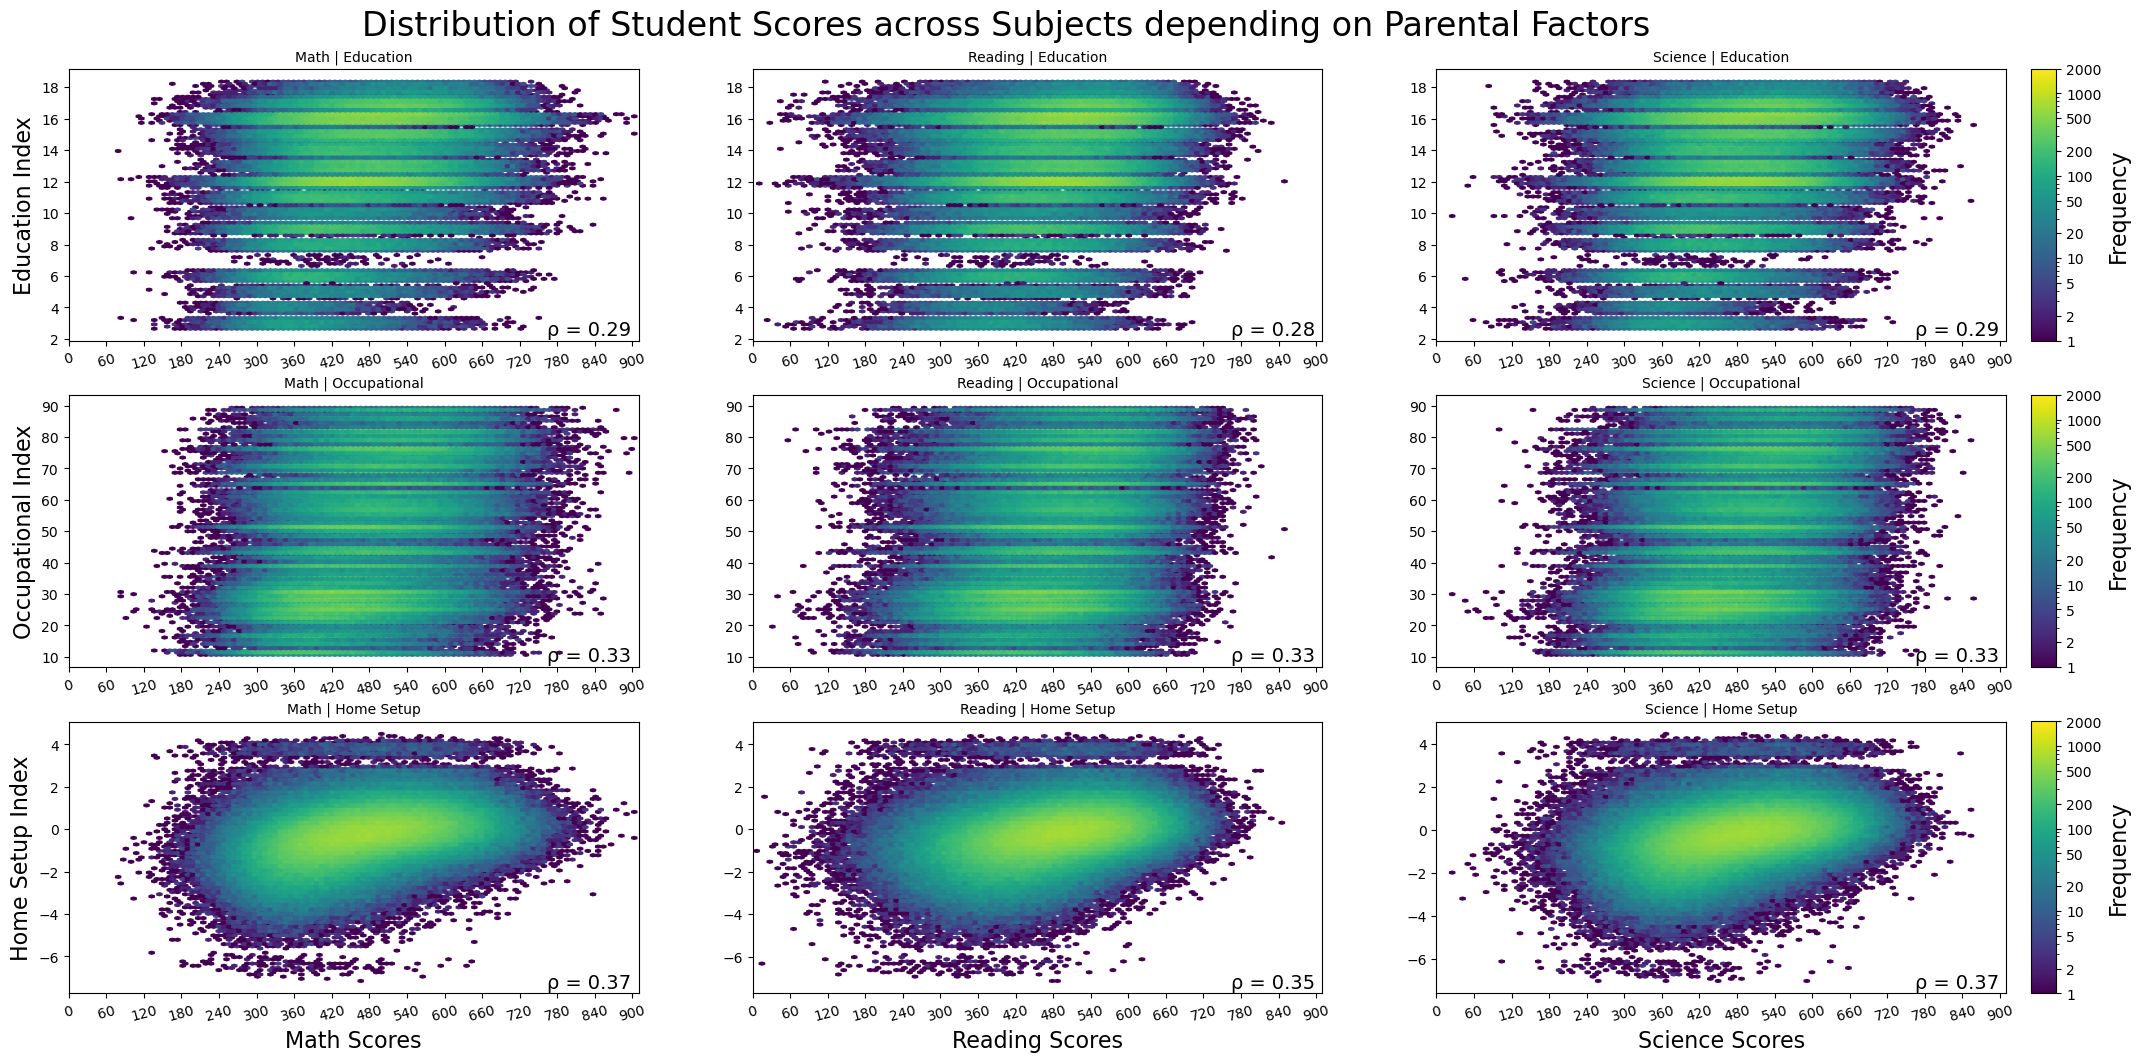

In [40]:
plot_dependent_distribution(pisa2012clean, Subjects, Dependencies)

## Each scatter plot shows student scores against different parental indices for math, reading, and science. Correlation coefficients are provided for each factor's relationship with the scores.

In [41]:
pisadict2012clean.T.to_csv('./data/pisadict2012clean.csv')
pisa2012clean.to_csv('./data/pisa2012clean.csv', index=False)